In [ ]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터셋 로드 및 전처리
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# 모델 생성
input_layer = tf.keras.layers.Input(shape=X_train.shape[1:])
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")(input_layer)
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")(hidden_layer1)
output_layer = tf.keras.layers.Dense(1)(hidden_layer2)
model = tf.keras.models.Model(inputs=[input_layer], outputs=[output_layer])

# 모델 컴파일 및 학습
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))


Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.2968 - val_loss: 1.5218
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7980 - val_loss: 0.6952
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6506 - val_loss: 0.5935
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5915 - val_loss: 0.5541
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5531 - val_loss: 0.5238
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5250 - val_loss: 0.4961
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5023 - val_loss: 0.4819
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4840 - val_loss: 0.4586
Epoch 9/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4694 - val_loss: 0.4412
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4575 - val_loss: 0.4332

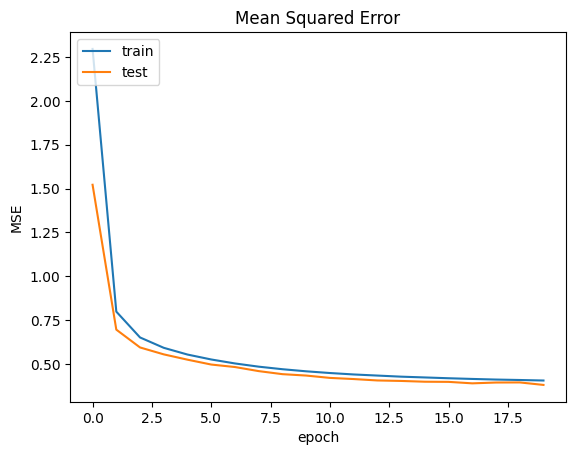

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
print(mnist.keys())

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [ ]:
x_data = mnist.data
y_data = mnist.target

print(x_data.shape)
print(y_data.shape)

(70000, 784)
(70000,)


In [ ]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(56000, 784)
(56000,)
(14000, 784)
(14000,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

print(np.max(np.max(x_train_scaled)), np.min(np.min(x_train_scaled)))
print(np.max(np.max(x_test_scaled)), np.min(np.min(x_test_scaled)))

1.0 0.0
1.0 0.0


In [ ]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

print(y_train[0:5])
print(y_train_onehot[0:5])

1416     7
69406    4
65034    6
47580    1
64473    0
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
[[0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


In [ ]:
from keras import layers, models

input_shape = (x_train_scaled.shape[1], )
clf_model_seq = models.Sequential()
clf_model_seq.add(layers.Dense(units = 50, activation = 'relu', input_shape = input_shape))
clf_model_seq.add(layers.Dense(units = 20, activation='relu'))
clf_model_seq.add(layers.Dense(units = 10, activation = 'softmax'))

clf_model_seq.compile(loss='categorical_crossentropy', metrics=['accuracy','categorical_accuracy'])
clf_model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                39250     
                                                                 
 dense_4 (Dense)             (None, 20)                1020      
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = clf_model_seq.fit(x_train_scaled, y_train_onehot, validation_data = [x_test_scaled, y_test_onehot],
                            batch_size = 32, epochs = 30)

Epoch 1/30
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3442 - accuracy: 0.9018 - categorical_accuracy: 0.9018 - val_loss: 0.1999 - val_accuracy: 0.9411 - val_categorical_accuracy: 0.9411
Epoch 2/30
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1619 - accuracy: 0.9522 - categorical_accuracy: 0.9522 - val_loss: 0.1439 - val_accuracy: 0.9564 - val_categorical_accuracy: 0.9564
Epoch 3/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1233 - accuracy: 0.9642 - categorical_accuracy: 0.9642 - val_loss: 0.1266 - val_accuracy: 0.9632 - val_categorical_accuracy: 0.9632
Epoch 4/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1043 - accuracy: 0.9695 - categorical_accuracy: 0.9695 - val_loss: 0.1112 - val_accuracy: 0.9685 - val_categorical_accuracy: 0.9685
Epoch 5/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0879 - accuracy: 0.9736 - categorical_accuracy: 0.9736 - val_loss: 0.1205 - val_ac

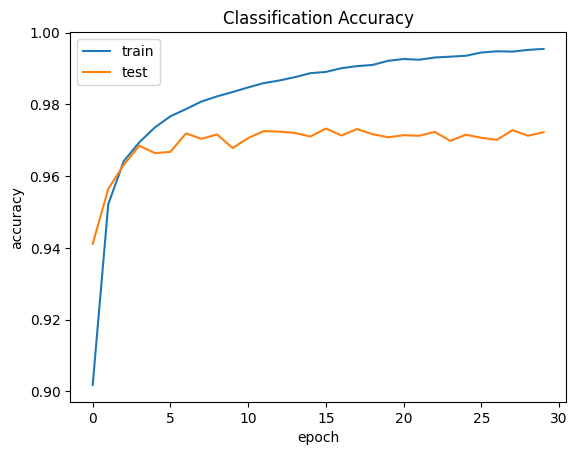

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

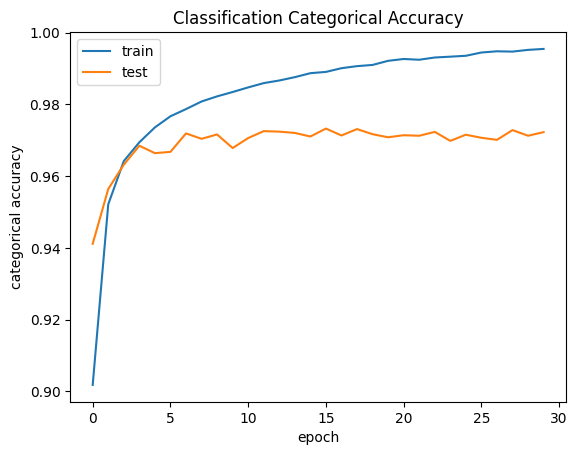

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Classification Categorical Accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

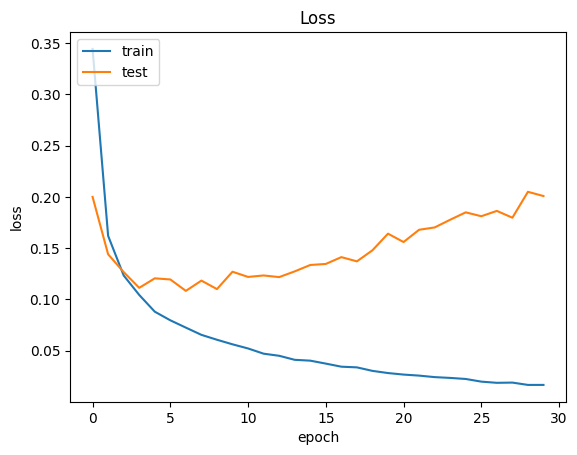

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
input_shape = (x_train_scaled.shape[1], )

input = layers.Input(shape=input_shape)
hidden_layer1 = layers.Dense(50, activation = 'relu')(input)
hidden_layer2 = layers.Dense(20, activation = 'relu')(hidden_layer1)
output = layers.Dense(10, activation = 'softmax')(hidden_layer2)

clf_model_func = models.Model(input, output)

clf_model_func.compile(loss = 'categorical_crossentropy', metrics=['accuracy', 'categorical_accuracy'])
clf_model_func.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 50)                39250     
                                                                 
 dense_7 (Dense)             (None, 20)                1020      
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = clf_model_func.fit(x_train_scaled, y_train_onehot, validation_data = [x_test_scaled, y_test_onehot], batch_size = 32, epochs = 30)

Epoch 1/30
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3258 - accuracy: 0.9052 - categorical_accuracy: 0.9052 - val_loss: 0.1868 - val_accuracy: 0.9436 - val_categorical_accuracy: 0.9436
Epoch 2/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1546 - accuracy: 0.9541 - categorical_accuracy: 0.9541 - val_loss: 0.1371 - val_accuracy: 0.9598 - val_categorical_accuracy: 0.9598
Epoch 3/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1172 - accuracy: 0.9647 - categorical_accuracy: 0.9647 - val_loss: 0.1218 - val_accuracy: 0.9657 - val_categorical_accuracy: 0.9657
Epoch 4/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0969 - accuracy: 0.9705 - categorical_accuracy: 0.9705 - val_loss: 0.1155 - val_accuracy: 0.9674 - val_categorical_accuracy: 0.9674
Epoch 5/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0833 - accuracy: 0.9747 - categorical_accuracy: 0.9747 - val_loss: 0.1090 - val_ac

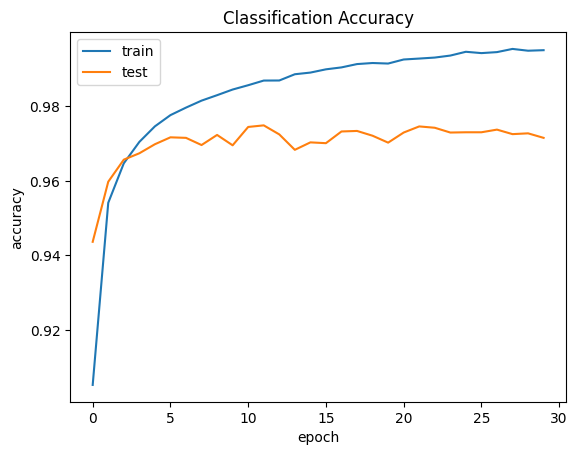

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

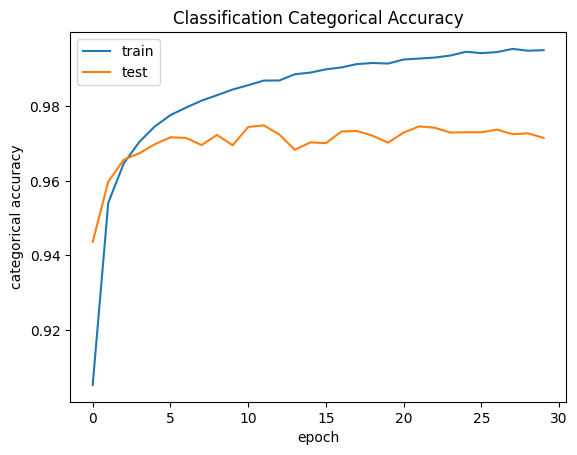

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Classification Categorical Accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

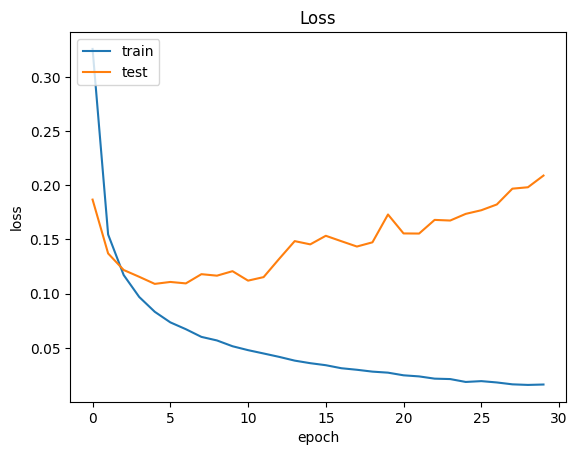

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()